In [2]:
using CSV
using DataFrames
using Dates
using ShiftedArrays

df = CSV.read("bloomberg_index.csv", DataFrame)
hy_df = df[:,[:Date, :US_High_Yield]]
dropmissing!(hy_df)
hy_df[!,"lag"] = mapcols(lag, hy_df)[!,"US_High_Yield"]
num_df = hy_df[:,["US_High_Yield","lag"]]
mapcols!(x -> log.(x), num_df)
hy_df[!,"return"] = num_df[!,"US_High_Yield"] - num_df[!,"lag"]
hy_df.Date = Date.(hy_df.Date,"y/m/d")

factor_df = CSV.read("FI400L_FacRet.20210115", DataFrame, delim="|")
factor_df[:,"Date"] = string.(factor_df[:,"DataDate"])
factor_set = Set{String}(factor_df[!,:Factor])

da = "df_test = DataFrame(Date=String[],"
for item in factor_set
    global da
    da *= (item * "=Float64[],")
end
da *= ")"
eval(Meta.parse(da))

date_set = Set{String}(factor_df[!,:Date])
date_array = []
for item in date_set
    push!(date_array,item)
end

for item in date_set
    push!(df_test, Dict(:Date=>item), cols=:union)
end

i = 1
for i in 1:length(factor_df[!,:Date])
    df_test[df_test.Date.==factor_df[i,:Date],factor_df[i,:Factor]] .= factor_df[i,:Return]
end

df_test.Date = Date.(df_test.Date,"yyyymmdd")
sort!(df_test,:Date)
df_test |> CSV.write("data_set_factor.csv",delim=',',writeheader=true)
data_set = innerjoin(df_test,hy_df[!,["Date","return"]],on=:Date)
data_set |> CSV.write("data_set.csv",delim=',',writeheader=true)

us_factor_list = String[]
for s in factor_set
    if occursin(r"^US", s) 
        push!(us_factor_list,s)
    end
end

us_factor_list_x = copy(us_factor_list)
push!(us_factor_list,"Date")
push!(us_factor_list,"return")
us_data_set = data_set[!,us_factor_list]

dropmissing(us_data_set) |> CSV.write("us_data_set_only.csv",delim=',',writeheader=true)

"us_data_set_only.csv"

In [2]:
us_data_set |> CSV.write("us_data_set_only_n.csv",delim=',',writeheader=true)

"us_data_set_only_n.csv"

In [5]:
dropmissing!(us_data_set)

520×125 DataFrame
 Row │ USD_MBS_ALL   USD_MBS_CONVENTIONAL_15YR  US_CDT_DTS_COND_MEDIA_IG  US_C ⋯
     │ Float64       Float64                    Float64                   Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  0.000877389                     0.0002                0.0230334        ⋯
   2 │ -0.000430736                    -0.0002                0.0234631
   3 │  0.000634969                     0.0004               -0.00252164
   4 │ -0.00018629                      0.0006                0.0143458
   5 │  0.000527543                     0.0                   0.0514748        ⋯
   6 │ -0.000581811                     0.0001               -0.0193931
   7 │  0.000583141                     0.0012               -0.0216544
   8 │ -0.000145175                    -0.0003               -0.00951225
   9 │ -0.000504565                    -0.0009               -0.0295948        ⋯
  10 │  0.000497701                     0.0012                0.0673688
  11 │ -0.000298781                    -0.0007               -0.0113958
  ⋮  │      ⋮                    ⋮                         ⋮                   ⋱
 511 │  0.0003933                       0.0002               -0.0312747
 512 │ -0.000162249                     0.0002                0.0572448        ⋯
 513 │  0.00185848                      0.0005                0.00847769
 514 │  0.000395103                     0.0002                0.0304442
 515 │  6.15988e-5                     -0.0003                0.0321978
 516 │  0.000291039                     0.0007                0.0606491        ⋯
 517 │  3.32135e-5                      0.0002               -0.0525921
 518 │  0.000551678                     0.0004                0.042009
 519 │  0.000256595                     0.001                -0.0444982
 520 │  0.000465226                     0.0003                0.0182466        ⋯
                                                122 columns and 499 rows omitted

In [6]:
using GLM

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


In [7]:
x_string = join(us_factor_list_x, " + ")

"USD_MBS_ALL + USD_MBS_CONVENTIONAL_15YR + US_CDT_DTS_COND_MEDIA_IG + US_CDT_DTS_COND_HY + USD_BASIS_OTR_1Y + USD_BASIS_OTR_10Y + USD_GOV_1Y + USD_MUNI_1Y + US_CDT_DTS_CONS_RET_IG + USD_MBS_CONVENTIONAL_30YR + US_CDT_DTS_FIN_CAPMK_IG + US_CDT_DTS_MAT_HY + USD_SWAP_SPREAD_5Y + US_CDT_DTS_TEL_DVRST_IG + USD_GOV_5Y + USD_MUNI_DTS_SPREAD + USD_MUNI_30Y + US_CDT_DTS_HLTH_PHRM_IG + US_CDT_DTS_FIN_HY + USD_INFL_20Y + USD_GOV_20Y + US_CDT_DTS_ENGY_HY + US_CDT_DTS_FIN_BANK_HY + USD_GOV_30Y + USD_GOV_2Y + US_CDT_DTS_FIN_REAL_IG + US_CDT_DTS_HLTH_HY + US_CDT_DTS_TEL_IG + USD_LOAN_TRANS + USD_LOAN_FIN + USD_MBS_GNMA_15YR + USD_GOV_6M + USD_BASIS_OTR_5Y + USD_INFL_30Y + USD_LOAN_TEL + US_CDT_DTS_COND_SERV_IG + US_CDT_DTS_UTL_ELTC_IG + US_CDT_DTS_UTL_IG + US_CDT_DTS_MAT_IG + US_CDT_DTS_COND_RET_IG + US_CDT_DTS_HLTH_IG + USD_LOAN_UTL + US_CDT_DTS_MAT_CHEM_IG + USD_INFL_50Y + USD_INFL_2Y + USD_LOAN_IND + US_CDT_DTS_UTL_HY + US_CDT_DTS_AGNCY + USD_INFL_1Y + US_CDT_DTS_COND_DURAP_IG + USD_ABS_UTILITIES 

In [11]:
go = "glm(@formula(return ~ " * x_string * "),us_data_set, Normal(), IdentityLink())"

"glm(@formula(return ~ USD_MBS_ALL + USD_MBS_CONVENTIONAL_15YR + US_CDT_DTS_COND_MEDIA_IG + US_CDT_DTS_COND_HY + USD_BASIS_OTR_1Y + USD_BASIS_OTR_10Y + USD_GOV_1Y + USD_MUNI_1Y + US_CDT_DTS_CONS_RET_IG + USD_MBS_CONVENTIONAL_30YR + US_CDT_DTS_FIN_CAPMK_IG + US_CDT_DTS_MAT_HY + USD_SWAP_SPREAD_5Y + US_CDT_DTS_TEL_DVRST_IG + USD_GOV_5Y + USD_MUNI_DTS_SPREAD + USD_MUNI_30Y + US_CDT_DTS_HLTH_PHRM_IG + US_CDT_DTS_FIN_HY + USD_INFL_20Y + USD_GOV_20Y + US_CDT_DTS_ENGY_HY + US_CDT_DTS_FIN_BANK_HY + USD_GOV_30Y + USD_GOV_2Y + US_CDT_DTS_FIN_REAL_IG + US_CDT_DTS_HLTH_HY + US_CDT_DTS_TEL_IG + USD_LOAN_TRANS + USD_LOAN_FIN + USD_MBS_GNMA_15YR + USD_GOV_6M + USD_BASIS_OTR_5Y + USD_INFL_30Y + USD_LOAN_TEL + US_CDT_DTS_COND_SERV_IG + US_CDT_DTS_UTL_ELTC_IG + US_CDT_DTS_UTL_IG + US_CDT_DTS_MAT_IG + US_CDT_DTS_COND_RET_IG + US_CDT_DTS_HLTH_IG + USD_LOAN_UTL + US_CDT_DTS_MAT_CHEM_IG + USD_INFL_50Y + USD_INFL_2Y + USD_LOAN_IND + US_CDT_DTS_UTL_HY + US_CDT_DTS_AGNCY + USD_INFL_1Y + US_CDT_DTS_COND_DURAP_I

In [12]:
eval(Meta.parse(go))

LoadError: LoadError: ArgumentError: expected formula separator ~, got return
in expression starting at none:1

In [13]:
go = "glm(@formula(return ~ " * "USD_MBS_ALL" * "),us_data_set, Normal(), IdentityLink())"
eval(Meta.parse(go))

LoadError: LoadError: ArgumentError: expected formula separator ~, got return
in expression starting at none:1

In [15]:
glm(@formula(USD_MBS_ALL ~ USD_MBS_ALL),us_data_set, Normal(), IdentityLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Normal{Float64},IdentityLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

USD_MBS_ALL ~ 1 + USD_MBS_ALL

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error                       z  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)  4.29948e-21  9.67723e-23                   44.43    <1e-99  4.10981e-21  4.48915e-21
USD_MBS_ALL  1.0          2.17174e-19  4604601871362801664.00    <1e-99  1.0          1.0
─────────────────────────────────────────────────────────────────────────────────────────────────

In [16]:
rename!(us_data_set, :return => :return_log)

520×125 DataFrame
 Row │ USD_MBS_ALL   USD_MBS_CONVENTIONAL_15YR  US_CDT_DTS_COND_MEDIA_IG  US_C ⋯
     │ Float64       Float64                    Float64                   Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  0.000877389                     0.0002                0.0230334        ⋯
   2 │ -0.000430736                    -0.0002                0.0234631
   3 │  0.000634969                     0.0004               -0.00252164
   4 │ -0.00018629                      0.0006                0.0143458
   5 │  0.000527543                     0.0                   0.0514748        ⋯
   6 │ -0.000581811                     0.0001               -0.0193931
   7 │  0.000583141                     0.0012               -0.0216544
   8 │ -0.000145175                    -0.0003               -0.00951225
   9 │ -0.000504565                    -0.0009               -0.0295948        ⋯
  10 │  0.000497701                     0.0012                0.0673688
  11 │ -0.000298781                    -0.0007               -0.0113958
  ⋮  │      ⋮                    ⋮                         ⋮                   ⋱
 511 │  0.0003933                       0.0002               -0.0312747
 512 │ -0.000162249                     0.0002                0.0572448        ⋯
 513 │  0.00185848                      0.0005                0.00847769
 514 │  0.000395103                     0.0002                0.0304442
 515 │  6.15988e-5                     -0.0003                0.0321978
 516 │  0.000291039                     0.0007                0.0606491        ⋯
 517 │  3.32135e-5                      0.0002               -0.0525921
 518 │  0.000551678                     0.0004                0.042009
 519 │  0.000256595                     0.001                -0.0444982
 520 │  0.000465226                     0.0003                0.0182466        ⋯
                                                122 columns and 499 rows omitted

In [27]:
go = "ols = lm(@formula(return_log ~ " * x_string * "),us_data_set, true)"

"ols = lm(@formula(return_log ~ USD_MBS_ALL + USD_MBS_CONVENTIONAL_15YR + US_CDT_DTS_COND_MEDIA_IG + US_CDT_DTS_COND_HY + USD_BASIS_OTR_1Y + USD_BASIS_OTR_10Y + USD_GOV_1Y + USD_MUNI_1Y + US_CDT_DTS_CONS_RET_IG + USD_MBS_CONVENTIONAL_30YR + US_CDT_DTS_FIN_CAPMK_IG + US_CDT_DTS_MAT_HY + USD_SWAP_SPREAD_5Y + US_CDT_DTS_TEL_DVRST_IG + USD_GOV_5Y + USD_MUNI_DTS_SPREAD + USD_MUNI_30Y + US_CDT_DTS_HLTH_PHRM_IG + US_CDT_DTS_FIN_HY + USD_INFL_20Y + USD_GOV_20Y + US_CDT_DTS_ENGY_HY + US_CDT_DTS_FIN_BANK_HY + USD_GOV_30Y + USD_GOV_2Y + US_CDT_DTS_FIN_REAL_IG + US_CDT_DTS_HLTH_HY + US_CDT_DTS_TEL_IG + USD_LOAN_TRANS + USD_LOAN_FIN + USD_MBS_GNMA_15YR + USD_GOV_6M + USD_BASIS_OTR_5Y + USD_INFL_30Y + USD_LOAN_TEL + US_CDT_DTS_COND_SERV_IG + US_CDT_DTS_UTL_ELTC_IG + US_CDT_DTS_UTL_IG + US_CDT_DTS_MAT_IG + US_CDT_DTS_COND_RET_IG + US_CDT_DTS_HLTH_IG + USD_LOAN_UTL + US_CDT_DTS_MAT_CHEM_IG + USD_INFL_50Y + USD_INFL_2Y + USD_LOAN_IND + US_CDT_DTS_UTL_HY + US_CDT_DTS_AGNCY + USD_INFL_1Y + US_CDT_DTS_CON

In [28]:
eval(Meta.parse(go))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

return_log ~ 1 + USD_MBS_ALL + USD_MBS_CONVENTIONAL_15YR + US_CDT_DTS_COND_MEDIA_IG + US_CDT_DTS_COND_HY + USD_BASIS_OTR_1Y + USD_BASIS_OTR_10Y + USD_GOV_1Y + USD_MUNI_1Y + US_CDT_DTS_CONS_RET_IG + USD_MBS_CONVENTIONAL_30YR + US_CDT_DTS_FIN_CAPMK_IG + US_CDT_DTS_MAT_HY + USD_SWAP_SPREAD_5Y + US_CDT_DTS_TEL_DVRST_IG + USD_GOV_5Y + USD_MUNI_DTS_SPREAD + USD_MUNI_30Y + US_CDT_DTS_HLTH_PHRM_IG + US_CDT_DTS_FIN_HY + USD_INFL_20Y + USD_GOV_20Y + US_CDT_DTS_ENGY_HY + US_CDT_DTS_FIN_BANK_HY + USD_GOV_30Y + USD_GOV_2Y + US_CDT_DTS_FIN_REAL_IG + US_CDT_DTS_HLTH_HY + US_CDT_DTS_TEL_IG + USD_LOAN_TRANS + USD_LOAN_FIN + USD_MBS_GNMA_15YR + USD_GOV_6M + USD_BASIS_OTR_5Y + USD_INFL_30Y + USD_LOAN_TEL + US_CDT_DTS_COND_SERV_IG + US_CDT_DTS_UTL_ELTC_IG + US_CDT_DTS_UTL_IG + US_CDT_DTS_MAT_IG + US_CDT_DTS_COND_RET_IG + US_CDT_DTS

In [31]:
ols.model.rr.wrkresid

LoadError: type LmResp has no field wrkresid

In [39]:
pred = predict(ols)
res = us_data_set[!,:return_log] .- pred
r2(ols)

0.6136183007222965

using Plots
plot(res,st=:histogram,title="histogram")  

In [42]:
using Statistics

In [43]:
mean(res)

3.381876776483631e-19

In [44]:
var(res)

2.2514485508997437e-6

In [45]:
kurtosis(res)

LoadError: UndefVarError: kurtosis not defined

In [46]:
using StatsBase

In [47]:
skewness(res)

0.02430645780476044

In [48]:
kurtosis(res)

2.7891156553595753

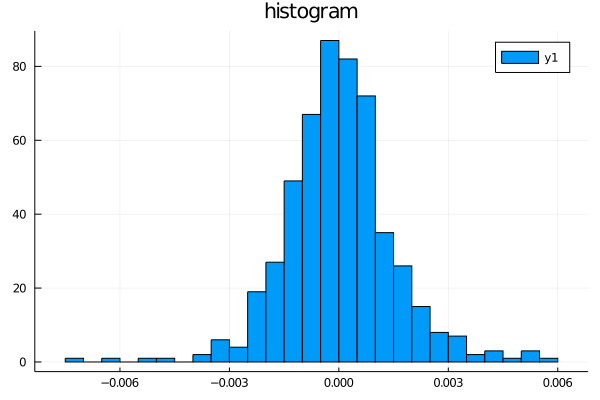

In [50]:
plot(res,st=:histogram,title="histogram")